In [1]:
# Loading the Dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = sns.load_dataset('titanic')

print("Dataset :- ")
print(df.info())  #detail of columnss and its data types
print("/nFirst 5 rows :- ")
print(df.head()) #first 5 rows
print("\nSummary stats :- ")
print(df.describe()) #showing the statistics of columns its avg,max,min

Dataset :- 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
None
/nFirst 5 rows :- 
   survived  pclass     sex   age  sibsp  p

In [3]:

#Finding the missing values

print("Missing values :\n", df.isnull().sum())

df['age'].fillna(df['age'].median(), inplace=True) #gaps in age

df['embarked'].fillna(df['embarked'].mode()[0], inplace=True) #finding gaps and filling with common values

df.drop(columns=['deck'], inplace=True, errors='ignore') #for any large number of missing dataset

print("\n After fixing , missing values :\n",df.isnull().sum()) #again check any missing values

Missing values :
 survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

 After fixing , missing values :
 survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    2
alive          0
alone          0
dtype: int64


In [4]:
#Making categorical into numberical

df['sex'] = df['sex'].map({'male':0,'female':1})# converting sex into binary (1 and 0)

df = pd.get_dummies(df,columns=['embarked'], prefix='embarked', drop_first = True)

print("\nAfter encoding :\n" , df.head())



After encoding :
    survived  pclass  sex   age  sibsp  parch     fare  class    who  \
0         0       3    0  22.0      1      0   7.2500  Third    man   
1         1       1    1  38.0      1      0  71.2833  First  woman   
2         1       3    1  26.0      0      0   7.9250  Third  woman   
3         1       1    1  35.0      1      0  53.1000  First  woman   
4         0       3    0  35.0      0      0   8.0500  Third    man   

   adult_male  embark_town alive  alone  embarked_Q  embarked_S  
0        True  Southampton    no  False       False        True  
1       False    Cherbourg   yes  False       False       False  
2       False  Southampton   yes   True       False        True  
3       False  Southampton   yes  False       False        True  
4        True  Southampton    no   True       False        True  


In [6]:
#Normalize the numerical feature

from sklearn.preprocessing import StandardScaler

# Numerical columns chuno
num_cols = ['age', 'fare']

# StandardScaler use  (mean = 0, std = 1)
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

# Check karo scaled data
print("\nAfter scaling:\n", df[num_cols].head())


After scaling:
         age      fare
0 -0.565736 -0.502445
1  0.663861  0.786845
2 -0.258337 -0.488854
3  0.433312  0.420730
4  0.433312 -0.486337


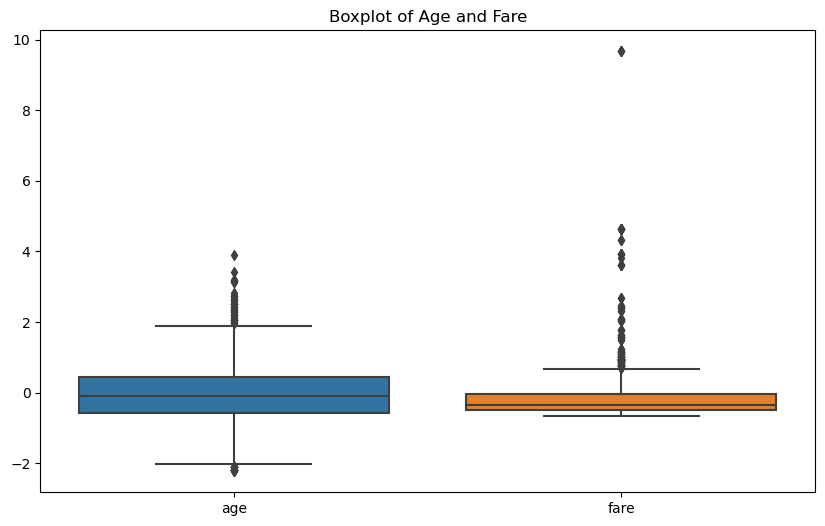


After removing outliers, shape: (718, 15)


In [7]:
# Boxplot banao
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['age', 'fare']])
plt.title("Boxplot of Age and Fare")
plt.show()

# Outliers remove karo (IQR method)
for col in ['age', 'fare']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

# Check karo cleaned data
print("\nAfter removing outliers, shape:", df.shape)